<a href="https://colab.research.google.com/github/psuny1116/kaggle/blob/main/walmart_recruiting_store_sales_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 캐글 Walmart Recruiting - Store Sales Forecasting
## https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting
### 월마트 판매량(weekly sales) 예측

#### 1. 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

os.environ['KAGGLE_USERNAME'] = 'parkssunyoung'
os.environ['KAGGLE_KEY'] = '0902c94d8f3ad7e48999476287ff8c40'

In [3]:
!kaggle competitions download -c walmart-recruiting-store-sales-forecasting
!unzip '*.zip'

sampleSubmission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
stores.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
features.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               

Archive:  test.csv.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                

Archive:  features.csv.zip
replace features.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: features.csv            

Archive:  sampleSubmission.csv.zip
replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sampleSubmission.

In [6]:
train = pd.read_csv('train.csv')
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
test = pd.read_csv('test.csv')
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [8]:
store = pd.read_csv('stores.csv')
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [9]:
# store 데이터 전처리(Type 칼럼이 문자로 되어 있으므로 이를 숫자로 변환)

store['Type'] = store['Type'].replace({'A' : 0, 'B' : 1, 'C' : 2})
store.head()

,Store,Type,Size
0,1,0,151315
1,2,0,202307
2,3,1,37392
3,4,0,205863
4,5,1,34875


In [10]:
feature = pd.read_csv('features.csv')
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [11]:
# feature 데이터 전처리(feature 데이터의 store칼럼을 그룹으로 묶은 뒤 각 그룹의 unemployment 평균 구하기)

ft_unemploy = feature.groupby('Store')['Unemployment'].mean()
ft_unemploy.head()

Store
1    7.440994
2    7.403959
3    7.006006
4    5.647450
5    6.163166
Name: Unemployment, dtype: float64

#### 2. 기존 train, test 데이터에 store 데이터와 ft_unemploy칼럼 합치기

In [12]:
# train, test 데이터에 store 데이터를 Store 칼럼 기준으로 병합

train = pd.merge(train, store, on = 'Store', how = 'left')
test = pd.merge(test, store, on = 'Store', how = 'left')
display(train, test)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,0,151315
1,1,1,2010-02-12,46039.49,True,0,151315
2,1,1,2010-02-19,41595.55,False,0,151315
3,1,1,2010-02-26,19403.54,False,0,151315
4,1,1,2010-03-05,21827.90,False,0,151315
...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,1,118221
421566,45,98,2012-10-05,628.10,False,1,118221
421567,45,98,2012-10-12,1061.02,False,1,118221
421568,45,98,2012-10-19,760.01,False,1,118221


,Store,Dept,Date,IsHoliday,Type,Size
0,1,1,2012-11-02,False,0,151315
1,1,1,2012-11-09,False,0,151315
2,1,1,2012-11-16,False,0,151315
3,1,1,2012-11-23,True,0,151315
4,1,1,2012-11-30,False,0,151315
...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,1,118221
115060,45,98,2013-07-05,False,1,118221
115061,45,98,2013-07-12,False,1,118221
115062,45,98,2013-07-19,False,1,118221


In [13]:
# train, test 데이터에 ft_unemploy 칼럼을 Store 칼럼 기준으로 병합

train = pd.merge(train, ft_unemploy, on = 'Store', how = 'left')
test = pd.merge(test, ft_unemploy, on = 'Store', how = 'left')
display(train, test)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Unemployment
0,1,1,2010-02-05,24924.50,False,0,151315,7.440994
1,1,1,2010-02-12,46039.49,True,0,151315,7.440994
2,1,1,2010-02-19,41595.55,False,0,151315,7.440994
3,1,1,2010-02-26,19403.54,False,0,151315,7.440994
4,1,1,2010-03-05,21827.90,False,0,151315,7.440994
...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,1,118221,8.640467
421566,45,98,2012-10-05,628.10,False,1,118221,8.640467
421567,45,98,2012-10-12,1061.02,False,1,118221,8.640467
421568,45,98,2012-10-19,760.01,False,1,118221,8.640467


,Store,Dept,Date,IsHoliday,Type,Size,Unemployment
0,1,1,2012-11-02,False,0,151315,7.440994
1,1,1,2012-11-09,False,0,151315,7.440994
2,1,1,2012-11-16,False,0,151315,7.440994
3,1,1,2012-11-23,True,0,151315,7.440994
4,1,1,2012-11-30,False,0,151315,7.440994
...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,1,118221,8.640467
115060,45,98,2013-07-05,False,1,118221,8.640467
115061,45,98,2013-07-12,False,1,118221,8.640467
115062,45,98,2013-07-19,False,1,118221,8.640467


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  int64  
 6   Size          421570 non-null  int64  
 7   Unemployment  421570 non-null  float64
dtypes: bool(1), float64(2), int64(4), object(1)
memory usage: 26.1+ MB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         115064 non-null  int64  
 1   Dept          115064 non-null  int64  
 2   Date          115064 non-null  object 
 3   IsHoliday     115064 non-null  bool   
 4   Type          115064 non-null  int64  
 5   Size          115064 non-null  int64  
 6   Unemployment  115064 non-null  float64
dtypes: bool(1), float64(1), int64(4), object(1)
memory usage: 6.3+ MB


#### 3. Date 칼럼을 datetime 형식으로 바꾸고 yeay, month, day, week 칼럼 추가

In [16]:
train['Date'] = pd.to_datetime(train['Date'])

train['year'] = train['Date'].dt.year
train['month'] = train['Date'].dt.month
train['day'] = train['Date'].dt.day
train['week'] = train['Date'].dt.week     # 공휴일이 몇째주에 위치해 있는지 확인하기 위해 week칼럼 추가

train['weeknum'] = np.ceil(train['day'] / 7)     # np.ceil = 올림, 각 달에 공휴일이 몇 번째 주에 있는지 확인
train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Unemployment,year,month,day,week,weeknum
0,1,1,2010-02-05,24924.50,False,0,151315,7.440994,2010,2,5,5,1.0
1,1,1,2010-02-12,46039.49,True,0,151315,7.440994,2010,2,12,6,2.0
2,1,1,2010-02-19,41595.55,False,0,151315,7.440994,2010,2,19,7,3.0
3,1,1,2010-02-26,19403.54,False,0,151315,7.440994,2010,2,26,8,4.0
4,1,1,2010-03-05,21827.90,False,0,151315,7.440994,2010,3,5,9,1.0


In [17]:
# train 데이터에서 만든 칼럼 그대로 test 데이터에도 추가

test['Date'] = pd.to_datetime(test['Date'])

test['year'] = test['Date'].dt.year
test['month'] = test['Date'].dt.month
test['day'] = test['Date'].dt.day
test['week'] = test['Date'].dt.week
test['weeknum'] = np.ceil(test['day'] / 7)
test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,Store,Dept,Date,IsHoliday,Type,Size,Unemployment,year,month,day,week,weeknum
0,1,1,2012-11-02,False,0,151315,7.440994,2012,11,2,44,1.0
1,1,1,2012-11-09,False,0,151315,7.440994,2012,11,9,45,2.0
2,1,1,2012-11-16,False,0,151315,7.440994,2012,11,16,46,3.0
3,1,1,2012-11-23,True,0,151315,7.440994,2012,11,23,47,4.0
4,1,1,2012-11-30,False,0,151315,7.440994,2012,11,30,48,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,1,118221,8.640467,2013,6,28,26,4.0
115060,45,98,2013-07-05,False,1,118221,8.640467,2013,7,5,27,1.0
115061,45,98,2013-07-12,False,1,118221,8.640467,2013,7,12,28,2.0
115062,45,98,2013-07-19,False,1,118221,8.640467,2013,7,19,29,3.0


#### 4. 추가한 칼럼들의 유용성 확인 - 시각화


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


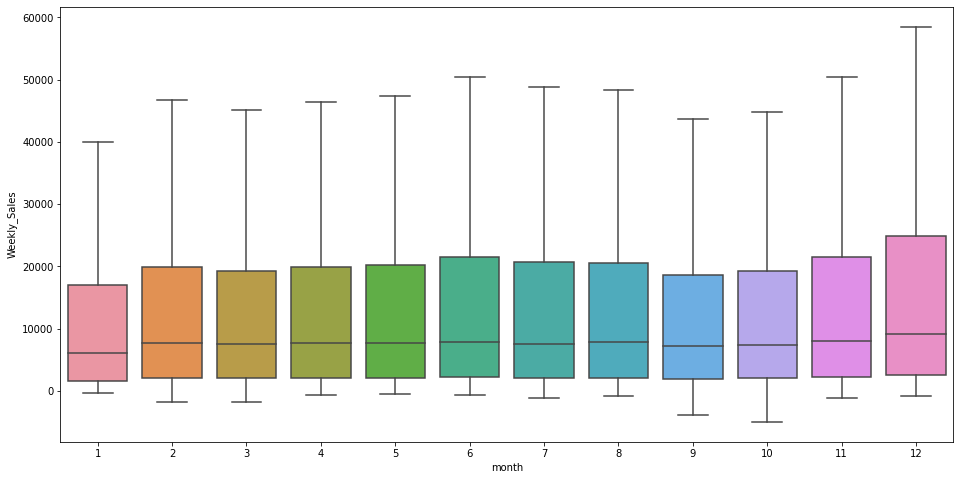

In [18]:
plt.figure(figsize = (16, 8))

# month 칼럼의 유용성 확인. Weekly_Sales: 정답 칼럼
sns.boxplot(train['month'], train['Weekly_Sales'], showfliers = False)     # showfilers = False 아웃라어이 제거

- 9월, 10월의 경우 최소값이 0이하로 나오는데 이는 반품이나 환불 때문에 발생

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


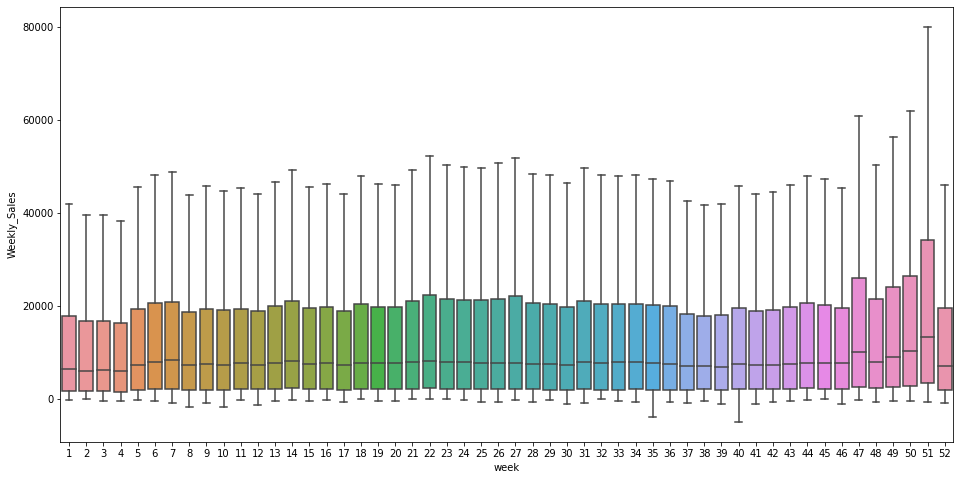

In [19]:
# week칼럼의 유용성 확인

plt.figure(figsize = (16, 8))
sns.boxplot(train['week'], train['Weekly_Sales'], showfliers = False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


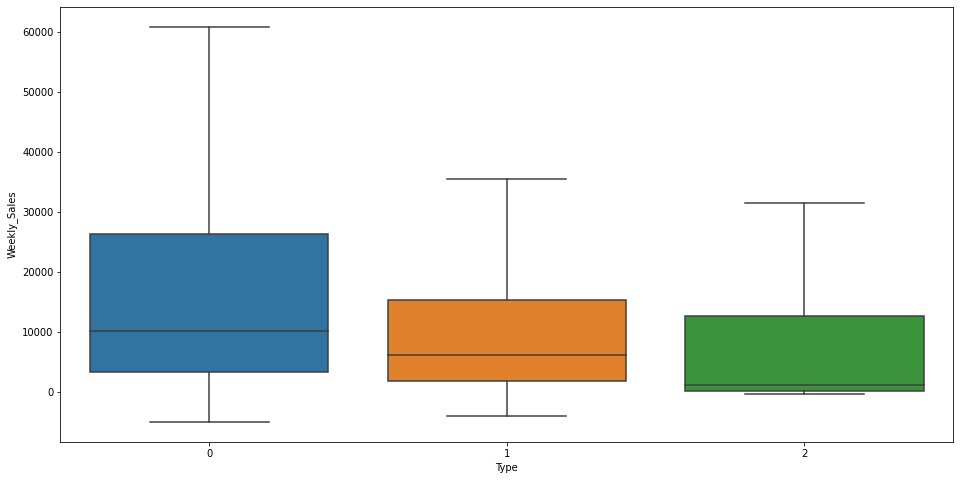

In [20]:
# Type 칼럼의 유용성 확인

plt.figure(figsize = (16, 8))
sns.boxplot(train['Type'], train['Weekly_Sales'], showfliers = False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


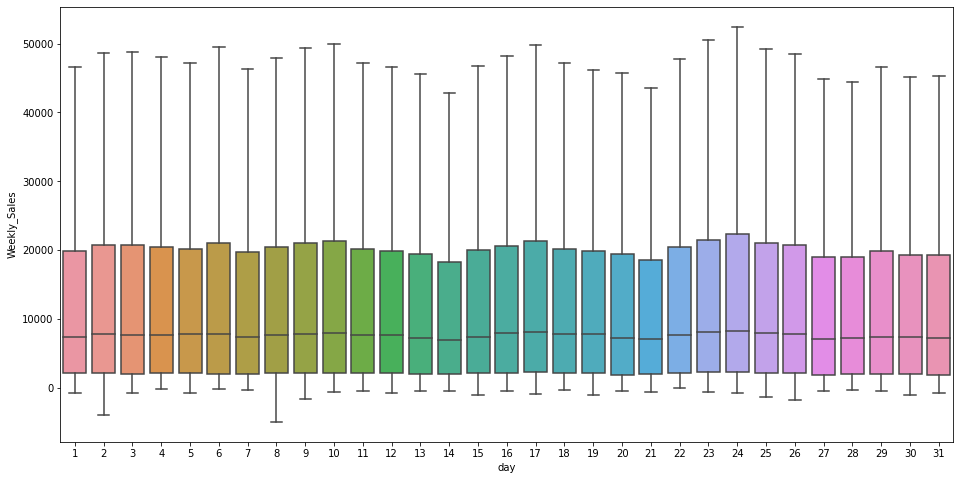

In [21]:
plt.figure(figsize = (16, 8))
sns.boxplot(train['day'], train['Weekly_Sales'], showfliers = False)

#### 5. 필요없는 칼럼 제외

In [22]:
train2 = train.drop(['Date', 'Weekly_Sales'], axis = 1)
train2

,Store,Dept,IsHoliday,Type,Size,Unemployment,year,month,day,week,weeknum
0,1,1,False,0,151315,7.440994,2010,2,5,5,1.0
1,1,1,True,0,151315,7.440994,2010,2,12,6,2.0
2,1,1,False,0,151315,7.440994,2010,2,19,7,3.0
3,1,1,False,0,151315,7.440994,2010,2,26,8,4.0
4,1,1,False,0,151315,7.440994,2010,3,5,9,1.0
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,False,1,118221,8.640467,2012,9,28,39,4.0
421566,45,98,False,1,118221,8.640467,2012,10,5,40,1.0
421567,45,98,False,1,118221,8.640467,2012,10,12,41,2.0
421568,45,98,False,1,118221,8.640467,2012,10,19,42,3.0


In [23]:
test2 = test.drop(['Date'], axis = 1)
test2

,Store,Dept,IsHoliday,Type,Size,Unemployment,year,month,day,week,weeknum
0,1,1,False,0,151315,7.440994,2012,11,2,44,1.0
1,1,1,False,0,151315,7.440994,2012,11,9,45,2.0
2,1,1,False,0,151315,7.440994,2012,11,16,46,3.0
3,1,1,True,0,151315,7.440994,2012,11,23,47,4.0
4,1,1,False,0,151315,7.440994,2012,11,30,48,5.0
...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,False,1,118221,8.640467,2013,6,28,26,4.0
115060,45,98,False,1,118221,8.640467,2013,7,5,27,1.0
115061,45,98,False,1,118221,8.640467,2013,7,12,28,2.0
115062,45,98,False,1,118221,8.640467,2013,7,19,29,3.0


#### 6. 모델링(random forest regressor)

In [24]:
from sklearn.ensemble import RandomForestRegressor

# 모델 선언
rf = RandomForestRegressor(n_jobs = 4)     # n_jobs = 4는 cpu 4개 사용한다는 뜻. n_jobs = -1이라고 쓰면 cpu 최대로 사용

In [25]:
%%time
rf.fit(train2, train['Weekly_Sales'])     # 모델 훈련

CPU times: user 4min 23s, sys: 3.89 s, total: 4min 27s
Wall time: 2min 33s


RandomForestRegressor(n_jobs=4)

In [26]:
result = rf.predict(test2)     # test2 결과 예측
result

array([34772.8671, 19804.2835, 19263.4445, ...,   704.911 ,   763.991 ,
         685.6602])

In [27]:
len(result)

115064

#### 7. 제출양식 불러오기

In [28]:
sub = pd.read_csv('sampleSubmission.csv')
sub

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0
...,...,...
115059,45_98_2013-06-28,0
115060,45_98_2013-07-05,0
115061,45_98_2013-07-12,0
115062,45_98_2013-07-19,0


#### 8. 제출양식에 결과 포함

In [29]:
sub['Weekly_Sales'] = result
sub

,Id,Weekly_Sales
0,1_1_2012-11-02,34772.8671
1,1_1_2012-11-09,19804.2835
2,1_1_2012-11-16,19263.4445
3,1_1_2012-11-23,20457.5418
4,1_1_2012-11-30,28379.7647
...,...,...
115059,45_98_2013-06-28,686.3201
115060,45_98_2013-07-05,673.6886
115061,45_98_2013-07-12,704.9110
115062,45_98_2013-07-19,763.9910


#### 9. 결과물 csv파일로 저장

In [30]:
sub.to_csv('sub.csv', index = 0)     # index 불포함

#### 캐글 결과 제출 방법
- data -> output -> /kaggle/working -> ~.csv파일 다운로드
- data -> input -> (프로젝트 제목) -> more actions -> open in new tab
- late submission -> step1: csv파일 제출 -> step2: 간단한 설명 -> make submission